In [1]:
from neural_implementation import neural_classification as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [30]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('../datasets/iris_extended.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [31]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 250
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [32]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

In [33]:
N = df.shape[0]
print(f'Velicina skupa podataka: {N}')

X = np.ones((N, m + 1))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]

y_tmp = df['variety']

Velicina skupa podataka: 250


In [34]:
classes = df['variety'].unique()
n_classes = len(classes)

print(f'Klase: {classes}')
print(f'Broj klasa: {n_classes}\n')

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Klase: ['Setosa' 'Versicolor' 'Virginica' 'Letosa' 'Helenica']
Broj klasa: 5

Mapiranje imena klasa u numericke vrednosti:
Setosa -> 0
Versicolor -> 1
Virginica -> 2
Letosa -> 3
Helenica -> 4

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Setosa
1 -> Versicolor
2 -> Virginica
3 -> Letosa
4 -> Helenica


In [35]:
mapper_cls_to_vec = {}
for i in range(n_classes):
    vec = np.zeros((n_classes,))
    vec[i] = 1
    
    mapper_cls_to_vec[i] = vec
    
print('Mapiranje numericke vrednosti u odgovarajuci vektor:')
for cls, vec in mapper_cls_to_vec.items():
    print(f'{cls} -> {vec}')

Mapiranje numericke vrednosti u odgovarajuci vektor:
0 -> [1. 0. 0. 0. 0.]
1 -> [0. 1. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0.]
3 -> [0. 0. 0. 1. 0.]
4 -> [0. 0. 0. 0. 1.]


In [ ]:
y = np.zeros((N, n_classes))
for i in range(N):
    cls = name_to_class_dict[y_tmp[i]]
    y[i] = mapper_cls_to_vec[cls]

In [37]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.  1.4 0.2]
 [1.  1.4 0.2]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.7 0.4]
 [1.  1.4 0.3]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.1]]
 ...
Ciljne promenljive:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
 ...


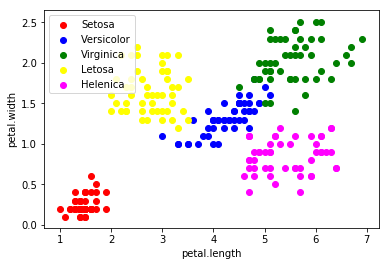

In [40]:
colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [41]:
nn = nc.NeuralNetwork(m, [3*m, 3*m, 3*m, 3*m], n_classes)

nn.print_layer_mapper_sizes()
print()

nn.print_model()

Dimenzije matrica modela koji mapiraju slojeve:
0 -> 1: 6 x 3
1 -> 2: 6 x 7
2 -> 3: 6 x 7
3 -> 4: 6 x 7
4 -> 5: 5 x 7

Model:
W_0: 0 -> 1
[[ 0.01856851  0.24610962 -0.27030322]
 [ 0.2738582   0.81879342  0.53207285]
 [ 0.87820272  0.88912559 -0.74436399]
 [-0.86106052  0.41494439 -0.77183038]
 [-0.49066872 -0.52405432 -0.28681093]
 [ 0.66777824  0.62614784  0.97545859]]
W_1: 1 -> 2
[[-0.19747315 -0.75439371 -0.69172465  0.74143725 -0.52272927 -0.04567914
  -0.54631265]
 [-0.76907944 -0.83054057 -0.56839059  0.11607476  0.02397934 -0.26046818
  -0.08092428]
 [-0.17495895  0.92235386  0.3518199   0.62934255 -0.00357082 -0.98086204
  -0.22339925]
 [ 0.84916979  0.14476276  0.91576909 -0.43413076 -0.21017246  0.38189727
   0.96446007]
 [ 0.04822975  0.86063893 -0.90567034 -0.77806904 -0.64531397 -0.33874742
  -0.78441636]
 [ 0.18300222  0.62239503  0.13525499 -0.70978976 -0.48751986 -0.09920844
  -0.1798863 ]]
W_2: 2 -> 3
[[ 0.36344102  0.65894235 -0.01508201  0.97860883 -0.33218572 -0.887

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [43]:
print(f'X_train:')
print(X_train)
print()

print(f'y_train:')
print(y_train)
print()

print(f'X_test:')
print(X_test)
print()

print(f'y_test:')
print(y_test)

X_train:
[[1.  2.6 1.8]
 [1.  1.2 0.2]
 [1.  2.6 1.4]
 [1.  2.7 1.7]
 [1.  4.8 0.6]
 [1.  2.3 1.7]
 [1.  1.3 0.3]
 [1.  4.1 1.3]
 [1.  6.1 1.9]
 [1.  4.3 1.3]
 [1.  4.7 1.4]
 [1.  4.3 1.3]
 [1.  2.  1.4]
 [1.  6.  1.8]
 [1.  5.6 1.8]
 [1.  4.4 1.3]
 [1.  5.  2. ]
 [1.  4.8 0.7]
 [1.  1.7 0.4]
 [1.  1.5 0.2]
 [1.  6.1 2.3]
 [1.  6.4 0.7]
 [1.  6.6 2.1]
 [1.  3.3 2.1]
 [1.  5.9 2.3]
 [1.  5.7 2.3]
 [1.  3.1 2.1]
 [1.  6.1 2.5]
 [1.  1.6 0.2]
 [1.  5.9 2.1]
 [1.  4.2 1.5]
 [1.  4.6 0.6]
 [1.  1.5 0.3]
 [1.  5.1 1.9]
 [1.  3.9 1.2]
 [1.  6.2 0.9]
 [1.  4.9 1.8]
 [1.  4.7 0.8]
 [1.  5.6 2.4]
 [1.  4.8 0.8]
 [1.  5.2 0.5]
 [1.  5.6 0.7]
 [1.  4.5 1.5]
 [1.  6.  1. ]
 [1.  4.8 0.9]
 [1.  2.6 1.5]
 [1.  2.7 1.3]
 [1.  4.9 1.5]
 [1.  4.7 1.1]
 [1.  5.1 1.8]
 [1.  6.7 2.2]
 [1.  2.8 1.6]
 [1.  6.  2.5]
 [1.  6.4 0.7]
 [1.  3.2 1.3]
 [1.  1.4 0.2]
 [1.  5.9 0.6]
 [1.  1.3 0.2]
 [1.  4.5 1.5]
 [1.  4.6 1.5]
 [1.  2.1 1.8]
 [1.  1.5 0.4]
 [1.  5.3 2.3]
 [1.  3.2 1.5]
 [1.  5.1 2.4]
 [1.  1.4 0.3]
 

In [44]:
lambdas = [0] + [0.01 * (1.5**i) for i in range(10)]
print('lamda parameters:')
print(lambdas)

lamda parameters:
[0, 0.01, 0.015, 0.0225, 0.03375, 0.050625, 0.0759375, 0.11390625, 0.170859375, 0.2562890625, 0.38443359375]


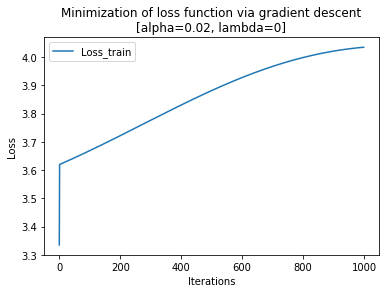

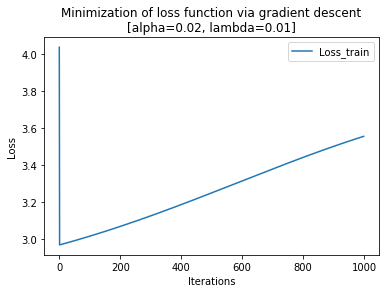

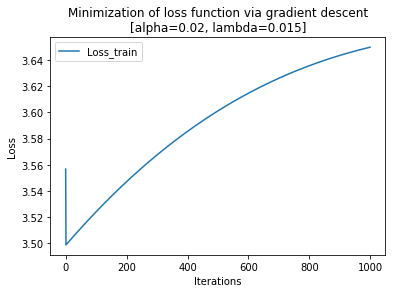

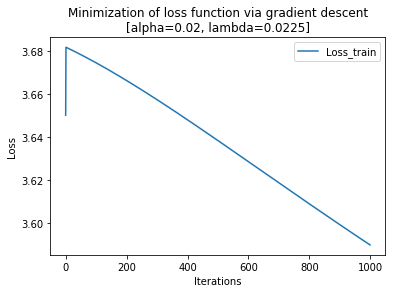

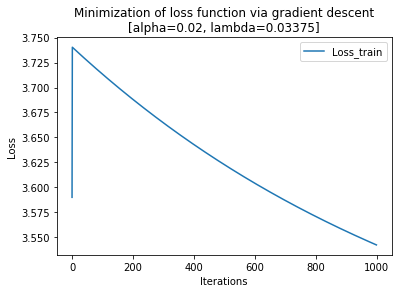

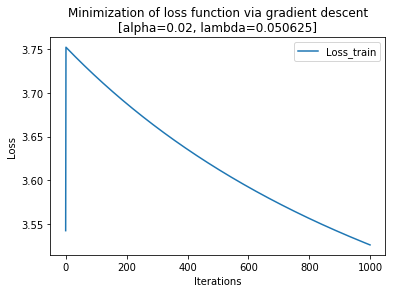

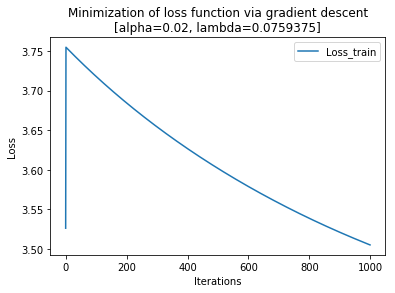

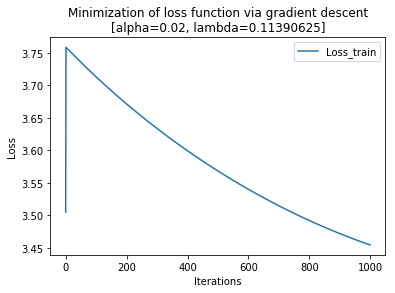

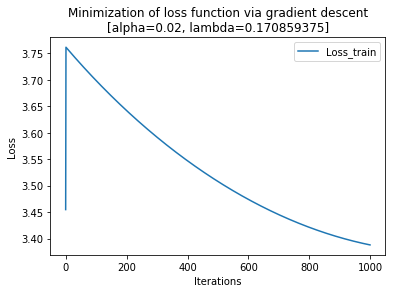

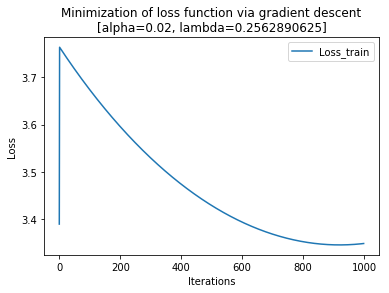

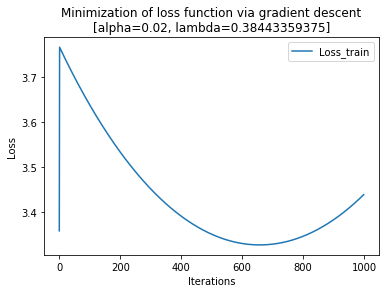

In [45]:
classifiers = [nn.fit(X_train, y_train, alpha=0.02, lambda_param=lambda_param, plot=True) 
               for lambda_param in lambdas]

In [46]:
losses_test = [clf.loss(X_test, y_test) for clf in classifiers]

print('Funkcije gubitka za svaki klasifikator posebno na test skupu:')
for i in range(len(losses_test)):
    print(f'Klasifikator {i}: loss = {losses_test[i]}')

Funkcije gubitka za svaki klasifikator posebno na test skupu:
Klasifikator 0: loss = 4.034560718766291
Klasifikator 1: loss = 3.557603732105945
Klasifikator 2: loss = 3.6508587282269636
Klasifikator 3: loss = 3.59045731735976
Klasifikator 4: loss = 3.5425988571884566
Klasifikator 5: loss = 3.526174192266445
Klasifikator 6: loss = 3.505179443063162
Klasifikator 7: loss = 3.455699469128875
Klasifikator 8: loss = 3.393508170206934
Klasifikator 9: loss = 3.373630585686116
Klasifikator 10: loss = 3.5666689000508662


In [47]:
min_loss = float('inf')
best_clf = None
best_lambda = None

for i in range(len(losses_test)):
    if losses_test[i] < min_loss:
        min_loss = losses_test[i]
        best_clf = classifiers[i]
        best_lambda = lambdas[i]
        
print(f'Najmanji gubitak (na test skupu) za svaki klasifikator: {min_loss}\n')
print(f'Model najboljeg klasifikatora:')

best_clf.print_model()
print()

print(f'Regularizacioni parametar lambda za koji je naucen najbolji model: {best_lambda}')
print(f'Najbolji lambda preko klasifikatora:: {best_clf.lambda_learned}')

Najmanji gubitak (na test skupu) za svaki klasifikator: 3.373630585686116

Model najboljeg klasifikatora:
Model:
W_0: 0 -> 1
[[ 9.65652538e-02  2.84309130e-06  1.38880562e-06]
 [ 2.86437954e-01  3.12252072e-06  1.72312479e-06]
 [ 8.60483030e-01  3.25243429e-06  1.40678541e-06]
 [-9.03725502e-01  1.28422712e-06  4.11108962e-07]
 [-4.81334010e-01  1.69963380e-06  9.22706107e-07]
 [ 6.71296079e-01  3.22535211e-06  1.94967877e-06]]
W_1: 1 -> 2
[[-3.21161832e-01 -8.64462888e-04 -9.41947971e-04 -1.15856016e-03
  -4.75508534e-04 -6.29774245e-04 -1.09140324e-03]
 [-9.91644564e-01  6.94255734e-05  7.57410579e-05  9.34630103e-05
   3.83348078e-05  5.07266938e-05  8.79525028e-05]
 [-5.19401531e-01  9.81858052e-05  1.06760520e-04  1.31455123e-04
   5.38404008e-05  7.10943653e-05  1.23533714e-04]
 [ 9.03449187e-01  1.19862597e-03  1.30634744e-03  1.60696770e-03
   6.59197384e-04  8.73542228e-04  1.51370638e-03]
 [ 2.39810826e-01 -2.32733662e-05 -2.59188682e-05 -3.17985896e-05
  -1.31503027e-05 -1.7

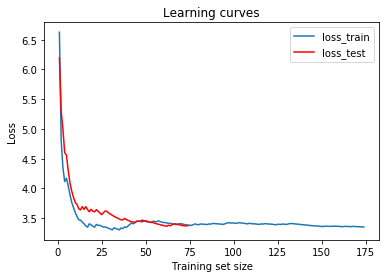

In [48]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, best_clf)

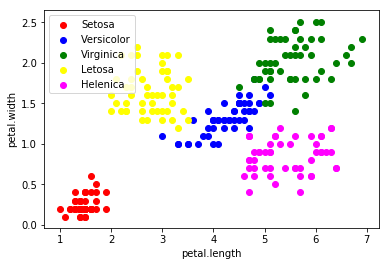

In [49]:
colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [53]:
petal_length = float(input('Unesite petal.length:'))
petal_width = float(input('Unesite petal.width:'))

x = np.array([1, petal_length, petal_width])
print(x)

[1.  6.  1.2]


In [ ]:
y_predict = best_clf.predict(x)
print(y_predict)

[0.52572741 0.56115901 0.52314318 0.41865738 0.21433997]


In [52]:
print(nn.predict(x))

[0.52363457 0.55570801 0.53696577 0.38267456 0.10854197]
